### Predict the house value

--True house value (testing set):	 [171400. 189600. 500001. ... 142900. 128300.  84700.]
--Predict house value (testing set):	 [211157.06335418 218581.64298574 465317.31295564 ... 201751.2396963
 160873.51846959 138847.26913352]
--The comprehensive score: 	 0.6321014171579478
Congratualtions! You passed!


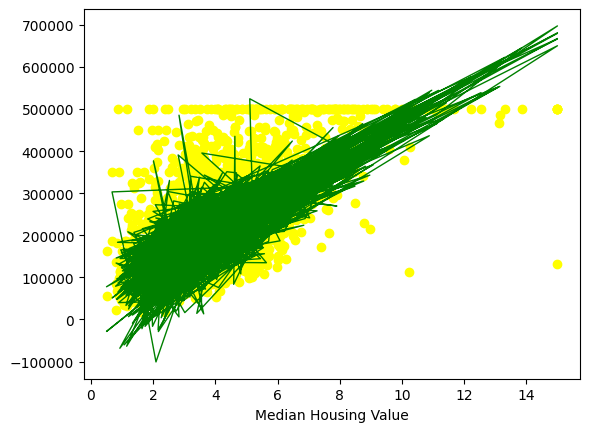

In [54]:
import pandas as pd
df_housing = pd.read_csv(
    "https://raw.githubusercontent.com/huangjia2019/house/master/house.csv")
df_housing

# Feature X, without median_house_value 房价
X = df_housing.drop("median_house_value", axis=1)
Y = df_housing.median_house_value  # Label Y, just the median_house_value

# divide 80% to train and left 20% for predict
from sklearn.model_selection import train_test_split  # NOQA
_X_train, _X_test, _Y_train, _Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0)


# Use linear regression (线性回归) as model to train
from sklearn.linear_model import LinearRegression  # NOQA
import numpy as np  # NOQA
model = LinearRegression()  # init the model
model.fit(_X_train, _Y_train)  # train with the data pair

# do predict
Y_pred = model.predict(_X_test)
print("--True house value (testing set):\t",  np.array(_Y_test))
print("--Predict house value (testing set):\t", np.array(Y_pred))

score = model.score(_X_test, _Y_test)
print("--The comprehensive score: \t", score)
if score > 0.6:
    print("Congratualtions! You passed!")

"Data View"
import matplotlib.pyplot as plt  # NOQA
# Draw 散点图 scatter to show `median income` and `median housing value`  locale
plt.scatter(_X_test.median_income, _Y_test, color='yellow')
# Draw 线性回归 linear regression line , from feature to label....
plt.plot(_X_test.median_income, Y_pred, color='green', linewidth=1)
plt.xlabel("Median Income")
plt.xlabel("Median Housing Value")
plt.show()



### Hello World: MNIST

1. Load data set

In [26]:
import pandas as pd

from keras.datasets import mnist
(train_X_img, train_Y_lable), (test_X_img, test_Y_lable) = mnist.load_data()
print(train_X_img.shape)
print(train_X_img[0].shape)
# print(X_train_iamge[0])
print(train_Y_lable[0])

(60000, 28, 28)
(28, 28)
5


2. preprocessor to these dataset

In [27]:
from keras.utils import to_categorical  # NOQA
# add one more dim to these
X_train = train_X_img.reshape(60000, 28, 28, 1)
X_test = test_X_img.reshape(10000, 28, 28, 1)

# convert to one-hot encode
y_train = to_categorical(train_Y_lable, 10)
y_test = to_categorical(test_Y_lable, 10)

print("The shape of train tensor: ", _X_train.shape)
print("First label of train", y_train[0])

The shape of train tensor:  (60000, 28, 28, 1)
First label of train [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


3. choose the model of ml  

> There are many algorithm, mainly with servals below:
   - linear (linerar regression, logic gregression)
   - non-linear (支持向量机， k最邻近分类等...)
   - tree (决策树，随机森林，梯度提升树等..)
   - neural-network (artifical 人工, convolution 卷积, long shor-term memory 长短期记忆... neural-network)

> Maybe the convolution neral-network is better for the image recongnition

In [29]:
from keras import models
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

"Use 序贯方式 to build the model, state machine?"
model = models.Sequential()

"add layers"
# add Conv2D layer(32 with 3x3 kernal), and specify the input data type
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))  # 二维卷积层
model.add(MaxPooling2D(pool_size=(2, 2)))  # 最大池化层

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # drop out to aviod overfitting(过拟合)

model.add(Flatten())

model.add(Dense(128, activation="relu"))  # full connection layer
model.add(Dropout(0.5))  # drop out to aviod overfitting(过拟合)

# use soft max to filter(activatie), output 10 dimension codes
model.add(Dense(10, activation="softmax"))

"compile"
model.compile(optimizer="rmsprop", loss="categorical_crossentropy",
              metrics=["accuracy"])  # specify the index(评估指标) of validation process


4. start train

In [31]:
"will display ever round's accuracy(训练数据), val_accuracy(验证数据)"
model.fit(X_train, y_train,
          # part of (30%) of train label will split into validation set
          validation_split=0.3,
          epochs=5,  # 5 ruounds for train
          batch_size=128,
          )


Epoch 1/5
329/329 [==============================] - 16s 48ms/step - loss: 0.0865 - accuracy: 0.9758 - val_loss: 0.0670 - val_accuracy: 0.9821
Epoch 2/5
329/329 [==============================] - 17s 53ms/step - loss: 0.0840 - accuracy: 0.9776 - val_loss: 0.0659 - val_accuracy: 0.9826
Epoch 3/5
329/329 [==============================] - 18s 55ms/step - loss: 0.0792 - accuracy: 0.9785 - val_loss: 0.0587 - val_accuracy: 0.9862
Epoch 4/5
329/329 [==============================] - 16s 50ms/step - loss: 0.0771 - accuracy: 0.9791 - val_loss: 0.0656 - val_accuracy: 0.9822
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0433 - accuracy: 0.9869
[0.043288297951221466, 0.9868999719619751]
The accuracy of predict in test dataset:  0.9868999719619751


5. Apply to test dataset

In [32]:

"Use the trained model to test dataset"
score = model.evaluate(X_test, y_test)
print(score)
print("The accuracy of predict in test dataset: ",score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0433 - accuracy: 0.9869
[0.043288297951221466, 0.9868999719619751]
The accuracy of predict in test dataset:  0.9868999719619751


1/1 [==============================] - 5s 5s/step
[3.2746362e-15 7.1119629e-12 7.5565909e-09 4.2245162e-11 1.3592175e-12
 2.2997104e-14 1.4517307e-16 1.0000000e+00 7.3262495e-13 3.6898717e-11] 
 conveting foramt.... 
 7


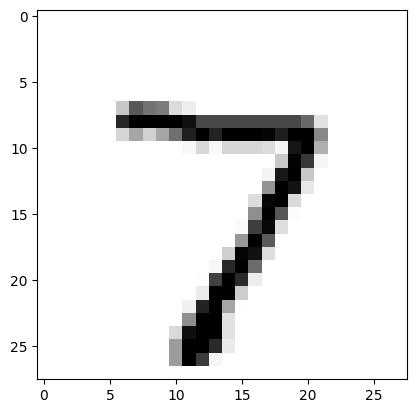

In [33]:
import matplotlib.pyplot as plt
"Additional testting"

pred = model.predict(X_test[0].reshape(1, 28, 28, 1))
print(pred[0], "\n conveting foramt.... \n", pred.argmax())
# print this test image
plt.imshow(X_test[0].reshape(28, 28), cmap="Greys")



### Bostion housing value

--True house value (testing set):	 [ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2 18.6 14.5 17.8 50.
 20.8 24.3 24.2 19.8 19.1 22.7 12.  10.2 20.  18.5 20.9 23.  27.5 30.1
  9.5 22.  21.2 14.1 33.1 23.4 20.1  7.4 15.4 23.8 20.1 24.5 33.  28.4
 14.1 46.7 32.5 29.6 28.4 19.8 20.2 25.  35.4 20.3  9.7 14.5 34.9 26.6
  7.2 50.  32.4 21.6 29.8 13.1 27.5 21.2 23.1 21.9 13.  23.2  8.1  5.6
 21.7 29.6 19.6  7.  26.4 18.9 20.9 28.1 35.4 10.2 24.3 43.1 17.6 15.4
 16.2 27.1 21.4 21.5 22.4 25.  16.6 18.6 22.  42.8 35.1 21.5 36.  21.9
 24.1 50.  26.7 25. ]
--Predict house value (testing set):	 [ 9.69267239 21.05859431 20.94145461 34.25223414 25.95902598 20.56741038
 28.15310405 25.07113862 20.30519458 22.82489511 20.29027213 18.07938917
 16.46141024 35.31166595 19.41369959 19.34727116 24.58140904 21.01346252
 19.99079236 23.79286427 12.20780045 17.14218992 22.51468752 12.92570511
 21.18070615 23.94073547 33.46176314 24.2631555  13.35213096 20.71939252
 23.45082103 19.1486881  36.09743765 23.4711

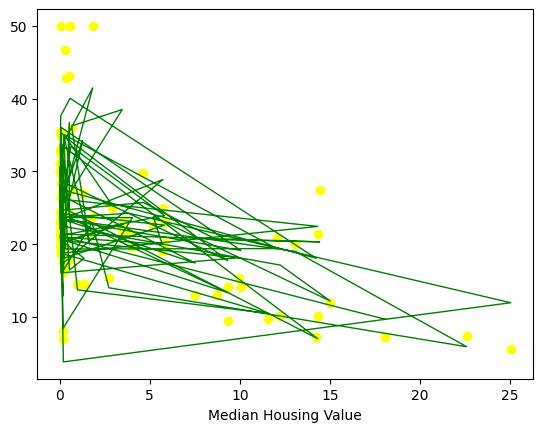

(102, 1)
(102,)


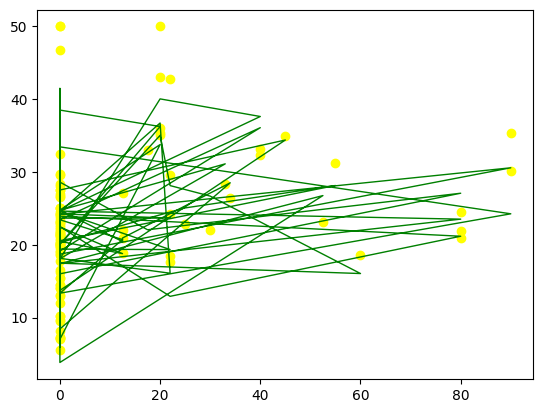

(102, 1)
(102,)


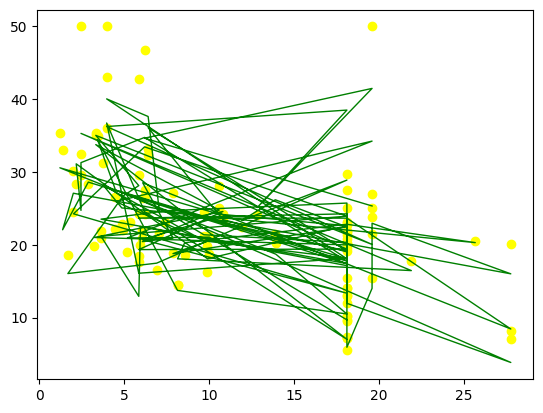

(102, 1)
(102,)


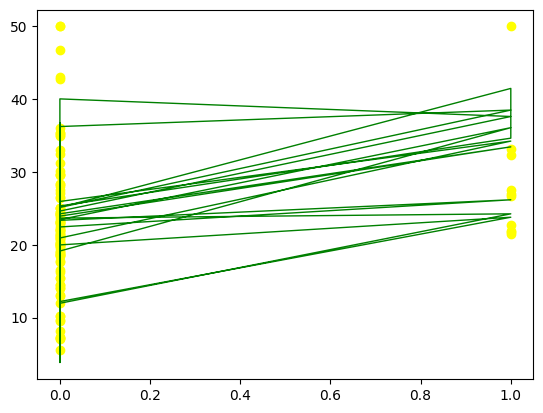

(102, 1)
(102,)


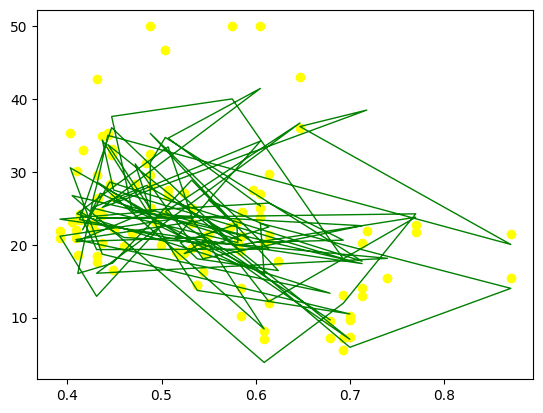

(102, 1)
(102,)


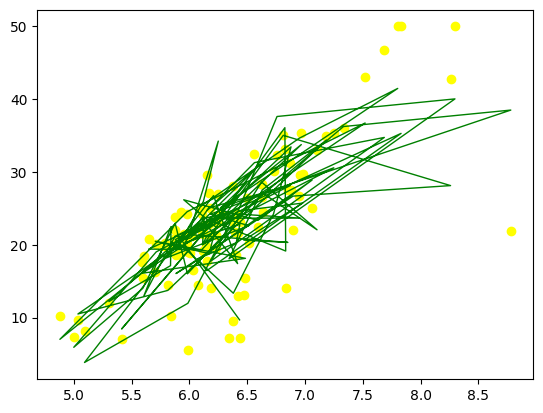

(102, 1)
(102,)


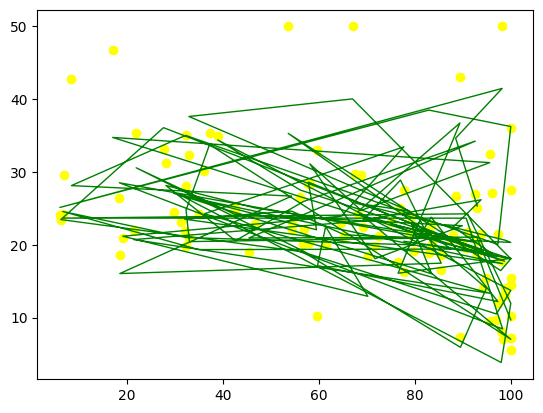

(102, 1)
(102,)


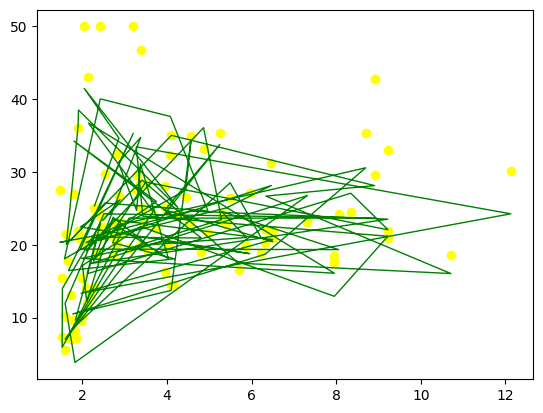

(102, 1)
(102,)


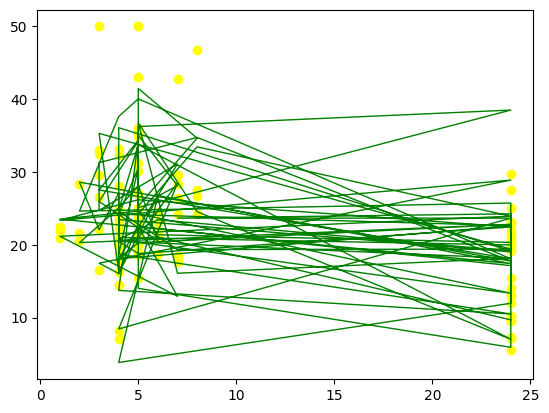

(102, 1)
(102,)


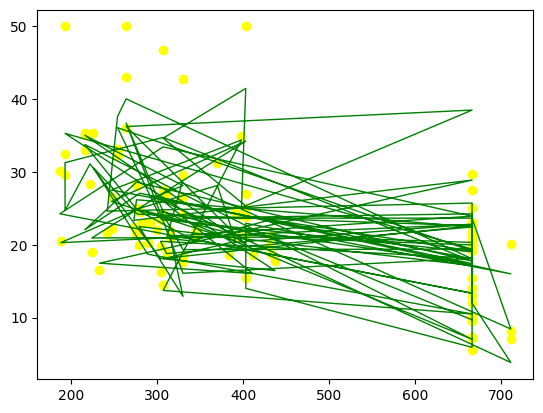

(102, 1)
(102,)


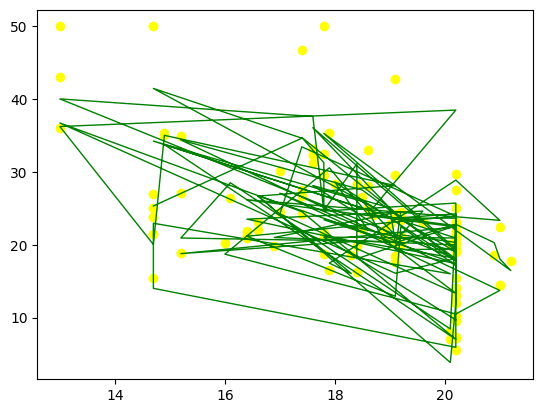

(102, 1)
(102,)


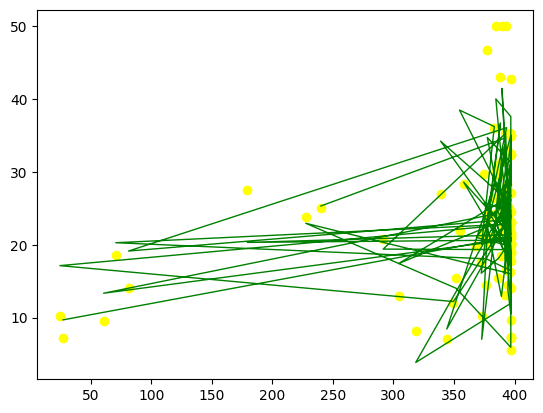

(102, 1)
(102,)


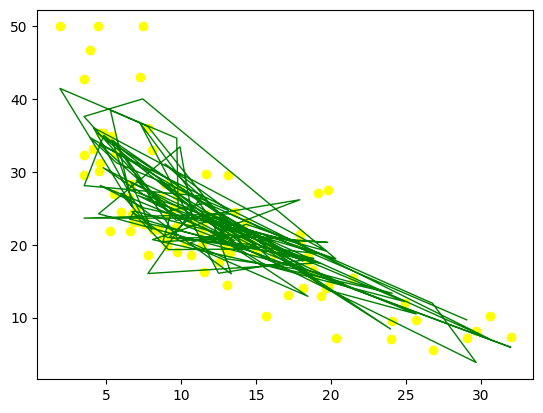

In [71]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
import pandas as pd

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
x_train_table = pd.DataFrame(x_train)
y_train_table = pd.DataFrame(y_train)
# table_0
# table_1


model = LinearRegression()  # init the model
model.fit(x_train, y_train)  # train with the data pair

# do predict
Y_pred = model.predict(x_test)
print("--True house value (testing set):\t",  np.array(y_test))
print("--Predict house value (testing set):\t", np.array(Y_pred))

score = model.score(x_test, y_test)
print("--The comprehensive score: \t", score)
if score > 0.6:
    print("===================================")
    print("Congratualtions! You passed!")
    print("===================================")

"Data View"


# Draw 线性回归 linear regression line , from feature to label....

plt.xlabel("Median Income")
plt.xlabel("Median Housing Value")
label = y_test
for i in range(len(x_test[0])):
    feature = x_test[:, [i]]
    print(feature.shape)
    print(label.shape)

    plt.scatter(feature, label, color='yellow')
    plt.plot(feature, Y_pred, color='green', linewidth=1)
    plt.show()
